   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

<ipython-input-7-f4bdfc4f27b9>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


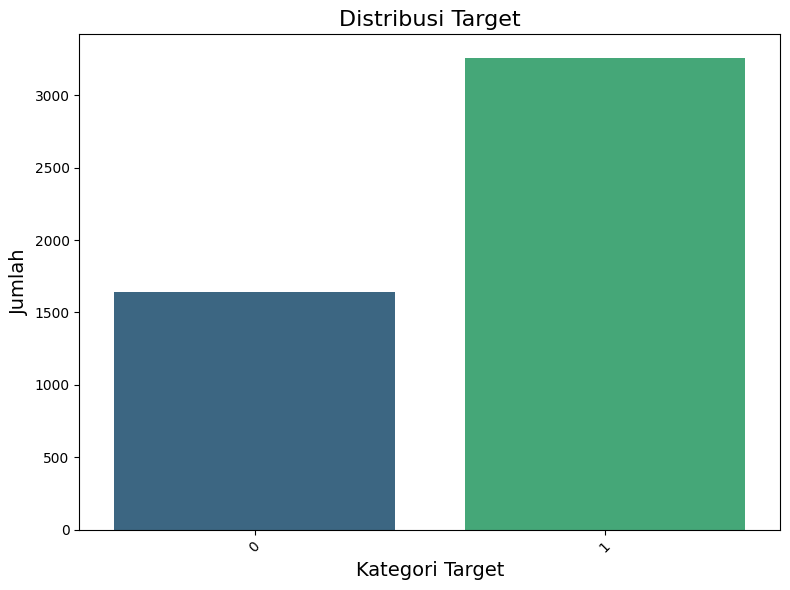

<ipython-input-7-f4bdfc4f27b9>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=data, palette='viridis')


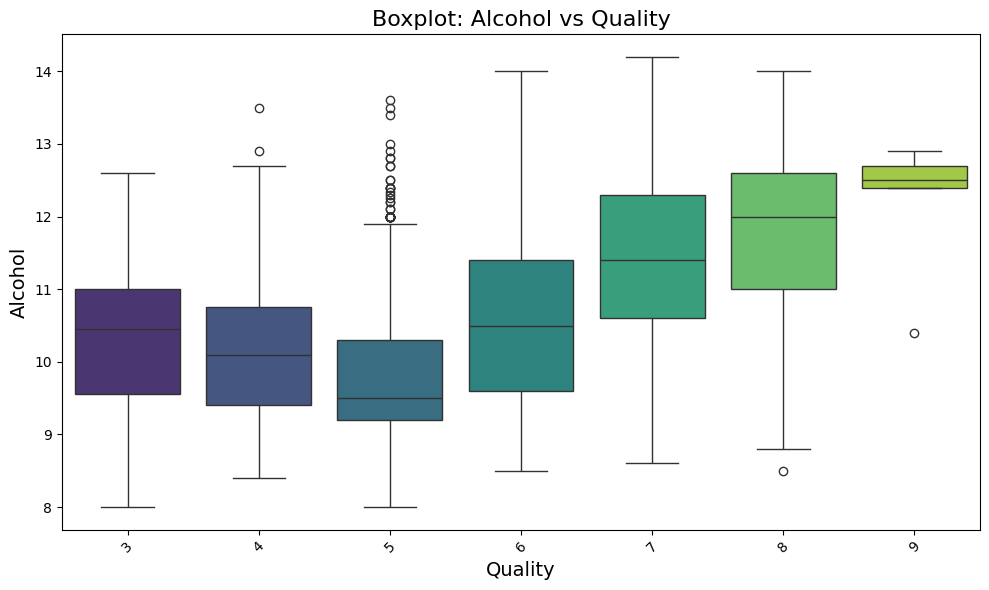

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters (Logistic Regression): {'logistic_regression__C': 1, 'logistic_regression__penalty': 'l2', 'logistic_regression__solver': 'liblinear'}
Best score (Logistic Regression): 0.7531908932155237
Accuracy on test set (Logistic Regression): 0.7489795918367347

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.66      0.49      0.56       321
           1       0.78      0.88      0.82       659

    accuracy                           0.75       980
   macro avg       0.72      0.68      0.69       980
weighted avg       0.74      0.75      0.74       980



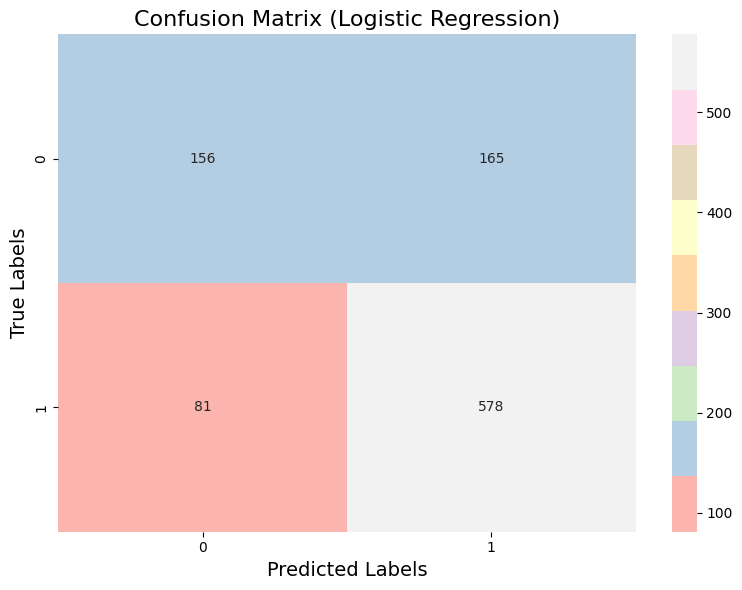

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters (Decision Tree): {'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': None, 'decision_tree__min_samples_leaf': 1, 'decision_tree__min_samples_split': 2}
Best score (Decision Tree): 0.7710486876743033
Accuracy on test set (Decision Tree): 0.7908163265306123

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       321
           1       0.85      0.84      0.84       659

    accuracy                           0.79       980
   macro avg       0.76      0.76      0.76       980
weighted avg       0.79      0.79      0.79       980



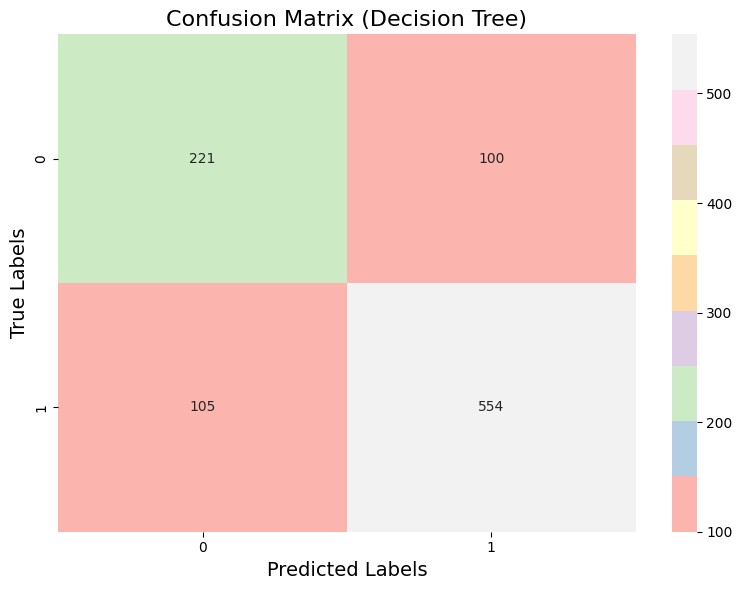

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters (k-NN): {'knn__metric': 'manhattan', 'knn__n_neighbors': 20, 'knn__weights': 'distance'}
Best score (k-NN): 0.8282293377120963
Accuracy on test set (k-NN): 0.8357142857142857

Classification Report (k-NN):
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       321
           1       0.85      0.91      0.88       659

    accuracy                           0.84       980
   macro avg       0.82      0.80      0.81       980
weighted avg       0.83      0.84      0.83       980



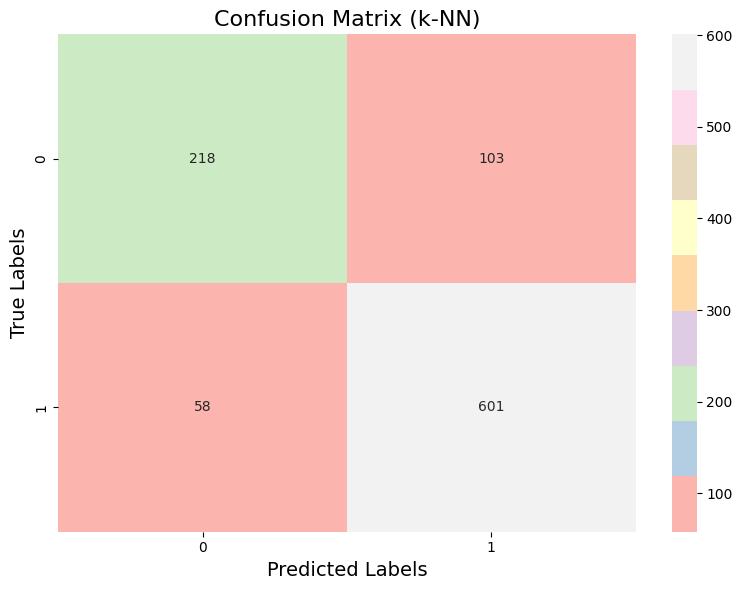

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:46:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters (XGBoost): {'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 5, 'xgb__n_estimators': 100, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 1, 'xgb__subsample': 1.0}
Best score (XGBoost): 0.8175026715667111
Accuracy on test set (XGBoost): 0.813265306122449

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       321
           1       0.85      0.88      0.86       659

    accuracy                           0.81       980
   macro avg       0.79      0.78      0.78       980
weighted avg       0.81      0.81      0.81       980



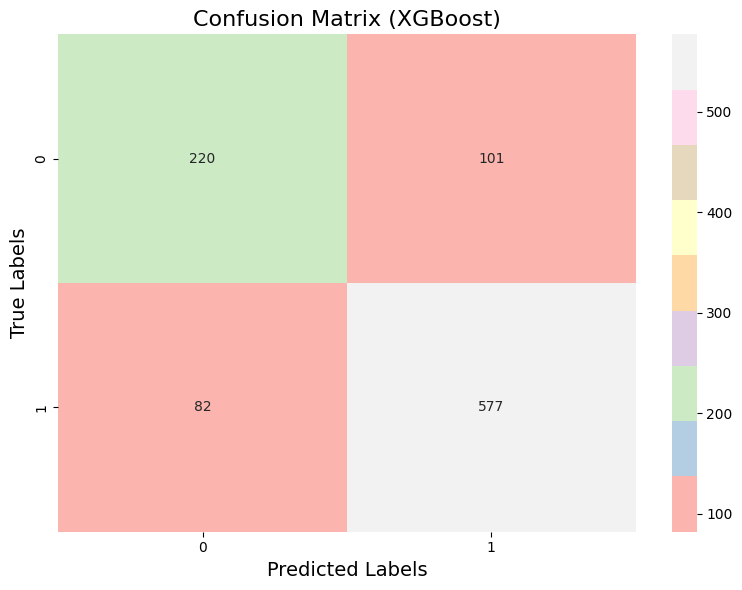

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import numpy as np

# Load the dataset
data = pd.read_csv('/content/winequality-white.csv', delimiter=';')

# Display the first few rows of the dataset
print(data.head())

# Check for duplicates
duplicate_rows = data[data.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")

# Check for missing values
print("Cek Missing Values:")
print(data.isnull().sum())

# Data Preprocessing
X = data.drop('quality', axis=1)
y = (data['quality'] >= 6).astype(int)  # Binary classification: good quality if rating >= 6

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='viridis')
plt.title('Distribusi Target', fontsize=16)
plt.xlabel('Kategori Target', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot for feature distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=data, palette='viridis')
plt.title('Boxplot: Alcohol vs Quality', fontsize=16)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Alcohol', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Logistic Regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(max_iter=1000))
])

param_grid_lr = {
    'logistic_regression__penalty': ['l1', 'l2'],
    'logistic_regression__C': [0.01, 0.1, 1, 10, 100],
    'logistic_regression__solver': ['liblinear']
}

grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

print("Best parameters (Logistic Regression):", grid_search_lr.best_params_)
print("Best score (Logistic Regression):", grid_search_lr.best_score_)

y_pred_lr = grid_search_lr.predict(X_test)
print("Accuracy on test set (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Pastel1')
plt.title('Confusion Matrix (Logistic Regression)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.tight_layout()
plt.show()

# Decision Tree
pipeline_dt = Pipeline([
    ('decision_tree', DecisionTreeClassifier())
])

param_grid_dt = {
    'decision_tree__criterion': ['gini', 'entropy'],
    'decision_tree__max_depth': [None, 5, 10, 20],
    'decision_tree__min_samples_split': [2, 5, 10],
    'decision_tree__min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("Best parameters (Decision Tree):", grid_search_dt.best_params_)
print("Best score (Decision Tree):", grid_search_dt.best_score_)

y_pred_dt = grid_search_dt.predict(X_test)
print("Accuracy on test set (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Pastel1')
plt.title('Confusion Matrix (Decision Tree)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.tight_layout()
plt.show()

# K-Nearest Neighbors
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'knn__n_neighbors': range(1, 21),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print("Best parameters (k-NN):", grid_search_knn.best_params_)
print("Best score (k-NN):", grid_search_knn.best_score_)

y_pred_knn = grid_search_knn.predict(X_test)
print("Accuracy on test set (k-NN):", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report (k-NN):")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Pastel1')
plt.title('Confusion Matrix (k-NN)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.tight_layout()
plt.show()

# XGBoost Classification
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

param_grid_xgb = {
    'xgb__n_estimators': [50, 100],
    'xgb__learning_rate': [0.1, 0.2],
    'xgb__max_depth': [3, 5],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0],
    'xgb__gamma': [0, 1],
    'xgb__reg_alpha': [0, 0.1],
    'xgb__reg_lambda': [1, 1.5]
}

grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print("Best parameters (XGBoost):", grid_search_xgb.best_params_)
print("Best score (XGBoost):", grid_search_xgb.best_score_)

y_pred_xgb = grid_search_xgb.predict(X_test)
print("Accuracy on test set (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Pastel1')
plt.title('Confusion Matrix (XGBoost)', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.tight_layout()
plt.show()

